In [3]:
import pygor.filehandling
import pygor.load
import pygor.strf.analyse

# External
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 
import pathlib
%reload_ext autoreload
%autoreload 2
# Test
user = pathlib.Path(os.getcwd()).parents[-3].stem
user

c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\skimage\util\dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


Found 6 custom classes in C:\Users\Simen\Git_repos\pygor\src\pygor\classes
Class names: ['CenterSurround', 'Core', 'Experiment', 'FullField', 'MovingBars', 'STRF']
Access custom classes using 'from pygor.load import ClassName'


'Simen'

# Analysis

# Get data, run analyses, and yield DataFrames

In [4]:
files = pygor.filehandling.find_files_in(".h5", r"..\src\pygor\examples", match = "demo", recursive=True) #"ColoursSWN"
files = files
files

[WindowsPath('../src/pygor/examples/strf_demo_data.h5')]

# Load pre-saved data

In [5]:
#files = pygor.filehandling.find_files_in(".h5", r"D:\Igor analyses\SWN", recursive=True, match = "SWN") #"ColoursSWN"
files = pygor.filehandling.find_files_in(".h5", fr"C:\Users\{user}\OneDrive\h5s", recursive=True, match = "SWN") #"ColoursSWN"
files = files
files

[WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-14_0_0_SWN_200_Colours.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_0_0_ColourSWN_200.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_0_2_ColourSWN_200_1.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_0_4_ColourSWN_200.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_MP_0_3_ColourSWN_200_.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-8_MP_0_0_ColourSWN_200_.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-13_0_0_ColourSWN_200_0.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-13_0_1_ColourSWN_200_0.h5'),
 WindowsPath("C:/Users/Simen/OneDrive/h5s/2023-6-14_'0_2_ColourSWN_200_0'.h5"),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-14_0_0_ColorSWN_200_0.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-14_SMP_0_2_ColourSWN_200_0.h5'),
 WindowsPath("C:/Users/Simen/OneDrive/h5s/2023-7-18_'0_1_ColourSWN_200_0'.h5"),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-7-18_Colo

# Pickle and save them 

In [6]:
# Instantiate the object list 
list_of_objs = pygor.filehandling.load_list(files, as_class = pygor.load.STRF, bs_bool = True)
list_of_objs

Iterating through and loading listed files:   0%|          | 0/17 [00:00<?, ?it/s]

Output()

[14-11-2023:STRF:2023-11-14_0_0_SWN_200_Colours]

In [13]:
pygor.filehandling.picklestore_objects(files, fr"C:\Users\{user}\OneDrive\Data\Pickles", as_class = pygor.load.STRF, bs_bool = True)

Iterating through, loading, and storing listed files as objects:   0%|          | 0/17 [00:00<?, ?it/s]

Output()

In [7]:
local_pkls = pygor.filehandling.find_files_in(".pkl", rf"C:\Users\{user}\OneDrive\Data\Pickles", recursive=True)
list_of_objs = pygor.filehandling.pickleload_objects(local_pkls)

Iterating through and loading listed .pkl files as objects:   0%|          | 0/17 [00:00<?, ?it/s]

Output()

In [7]:
for i in list_of_objs:
    pygor.filehandling.save_pkl(i, r"C:\Users\Simen\OneDrive\Data\Pickles", i.name)
#     pygor.filehandling.save_pkl(i, r"D:\Pickles", i.name)

PicklingError: Can't pickle <class 'pygor.classes.strf_data.STRF'>: it's not the same object as pygor.classes.strf_data.STRF

# Plotting

In [8]:
import pygor.strf.plot
import pygor.strf.analyse
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")
exp = pygor.load.Experiment(list_of_objs)

In [9]:
exp.detach_data([2,3])

Detaching data: ['2023-11-7_0_2_ColourSWN_200_1', '2023-11-7_0_4_ColourSWN_200']


In [11]:
exp.recording_id

,id,name,date,num_rois,type,path
0,0,2023-11-14_0_0_SWN_200_Colours,14-11-2023,11,STRF,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...
1,1,2023-11-7_0_0_ColourSWN_200,07-11-2023,70,STRF,C:\Users\Simen\OneDrive\h5s\2023-11-7_0_0_Colo...
2,4,2023-11-7_MP_0_3_ColourSWN_200_,07-11-2023,52,STRF,C:\Users\Simen\OneDrive\h5s\2023-11-7_MP_0_3_C...
3,5,2023-11-8_MP_0_0_ColourSWN_200_,08-11-2023,31,STRF,C:\Users\Simen\OneDrive\h5s\2023-11-8_MP_0_0_C...
4,6,2023-6-13_0_0_ColourSWN_200_0,13-06-2023,59,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-13_0_0_Colo...
5,7,2023-6-13_0_1_ColourSWN_200_0,13-06-2023,19,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-13_0_1_Colo...
6,8,2023-6-14_'0_2_ColourSWN_200_0',14-06-2023,31,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-14_'0_2_Col...
7,9,2023-6-14_0_0_ColorSWN_200_0,14-06-2023,62,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-14_0_0_Colo...
8,10,2023-6-14_SMP_0_2_ColourSWN_200_0,14-06-2023,31,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-14_SMP_0_2_...
9,11,2023-7-18_'0_1_ColourSWN_200_0',18-07-2023,13,STRF,C:\Users\Simen\OneDrive\h5s\2023-7-18_'0_1_Col...


## Plot population stats roy-by-roi

In [143]:
roi_df = pygor.strf.analyse.roi_stats(exp)

C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:122: RuntimeWarning: Mean of empty slice
  
c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
 

In [111]:
tom_format = roi_df[["contour_area_total", "dom_centroids", "colour"]].replace(0, np.nan)
tom_format.to_csv(r"C:\Users\Simen\Downloads\strf_stats.csv")

In [483]:
roi_df.query("contour_area_total > 0")

,date,path,filename,roi,ipl_depths,multicolour,colour,simultaneous,combo,size,...,dom_biphasic_index,pols_corr,neg_auc,pos_auc,neg_peaktime,pos_peaktime,dom_peaktime,neg_centroids,pos_centroids,dom_centroids
0,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,0,NaN,True,R,n,NaN,200,...,-0.264469,-0.511278,-11.491801,16.178968,17,15,17,1.437678,0.997766,1.437678
1,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,0,NaN,True,G,n,NaN,200,...,-0.385760,-0.063158,-10.267724,3.205587,16,16,16,1.310973,1.889510,1.310973
7,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,1,NaN,True,UV,n,NaN,200,...,0.255736,0.323308,0.060292,5.581895,11,17,17,3.396064,2.134148,2.134148
8,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,2,NaN,True,R,n,NaN,200,...,-0.915480,-0.503759,-35.504267,6.356118,16,8,16,0.896226,0.884518,0.896226
12,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,3,NaN,True,R,n,NaN,200,...,-0.807292,0.763910,-32.155746,0.265123,15,2,15,0.894594,3.055882,0.894594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,17,NaN,True,B,n,NaN,200,...,0.776432,0.796992,-13.154798,3.835389,16,12,12,1.197755,1.072698,1.072698
2192,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,19,76.0,True,R,n,NaN,200,...,0.043060,0.712782,-35.876664,0.864487,11,17,17,1.000066,2.216436,2.216436
2193,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,19,30.0,True,G,n,NaN,200,...,-0.054521,0.851128,-2.460846,-1.500273,3,16,16,1.476570,1.917303,1.917303
2197,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,20,93.0,True,G,n,NaN,200,...,-0.858623,0.870677,-21.219128,-2.704711,15,2,15,1.100325,1.214612,1.100325


In [ ]:
roi_df.columns

Index(['date', 'path', 'filename', 'roi', 'ipl_depths', 'multicolour',
       'colour', 'simultaneous', 'combo', 'size', 'shapeZ', 'shapeY', 'shapeX',
       'XYratio', 'visang_size', 'frequency', 'noise', 'time_pval',
       'space_pval', 'neg_contour_bool', 'pos_contour_bool',
       'neg_contour_count', 'pos_contour_count', 'total_contour_count',
       'neg_contour_area_total', 'pos_contour_area_total',
       'contour_area_total', 'contour_complexity', 'neg_extrema',
       'pos_extrema', 'polarity', 'neg_biphasic_index', 'pos_biphasic_index',
       'dom_biphasic_index', 'pols_corr', 'neg_auc', 'pos_auc', 'neg_peaktime',
       'pos_peaktime', 'dom_peaktime', 'neg_centroids', 'pos_centroids',
       'dom_centroids'],
      dtype='object')

### Assess how well contouring has worked
If the majority have 0 or 1 contour, we are good to go

<AxesSubplot: xlabel='total_contour_count', ylabel='Count'>

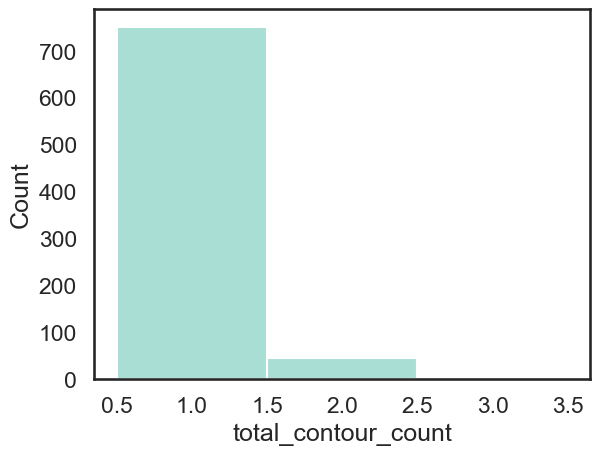

In [144]:
sns.histplot(roi_df.query("contour_area_total > 0"), x = "total_contour_count", discrete=True)

<AxesSubplot: xlabel='contour_area_total', ylabel='dom_centroids'>

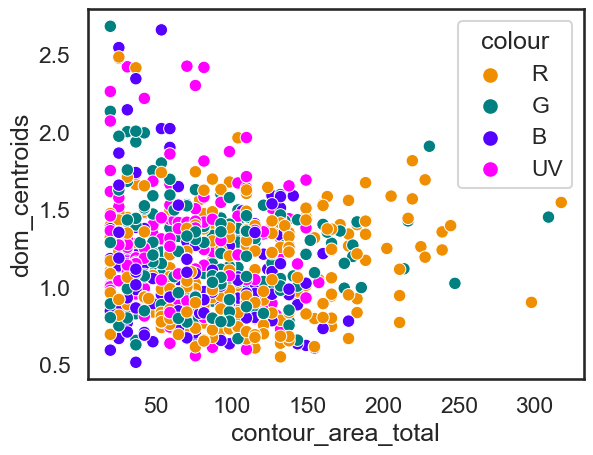

In [145]:
sns.scatterplot(data = roi_df.query("contour_area_total > 0"), x = "contour_area_total", y = "dom_centroids", hue = "colour", palette=pygor.plotting.custom.fish_palette)

In [26]:
roi_df.query("polarity == 1")

,date,path,filename,roi,ipl_depths,multicolour,colour,simultaneous,combo,size,...,dom_biphasic_index,pols_corr,neg_auc,pos_auc,neg_peaktime,pos_peaktime,dom_peaktime,neg_centroids,pos_centroids,dom_centroids


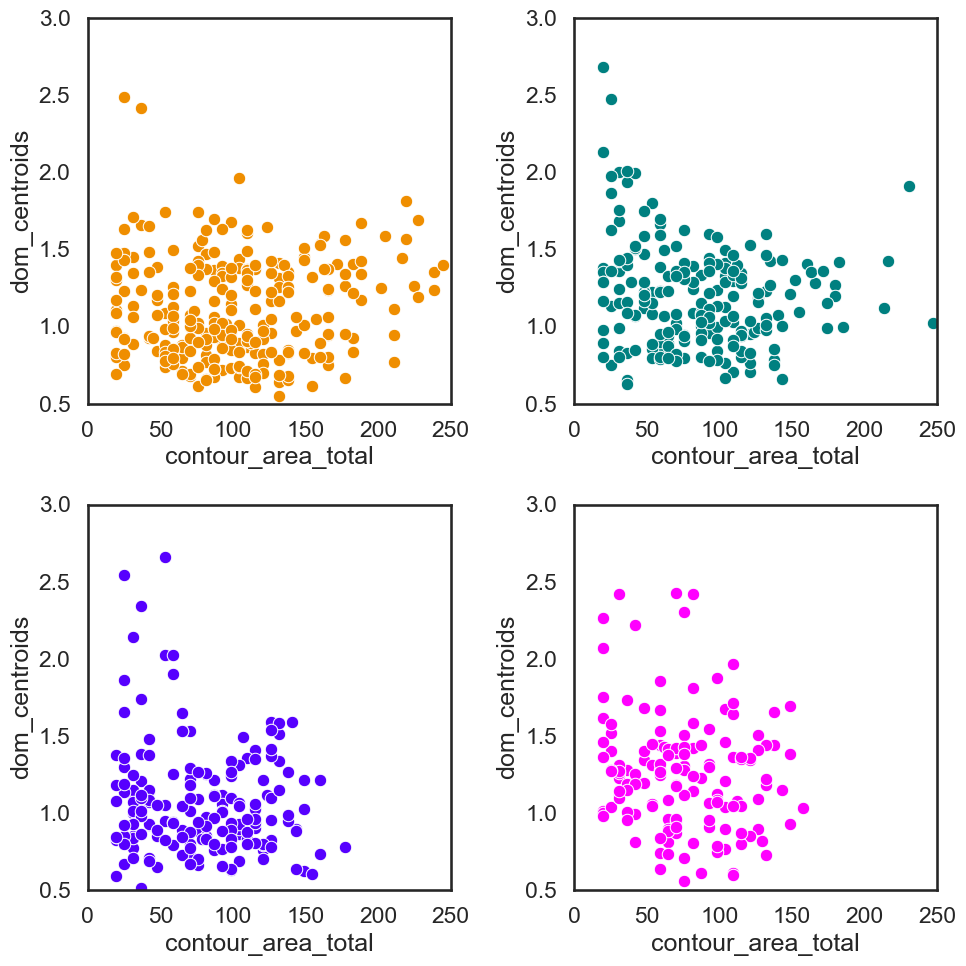

In [147]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
non_zeros = roi_df.query("contour_area_total > 0")
sns.scatterplot(data = non_zeros.query("colour == 'R'"), x = "contour_area_total",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0])
sns.scatterplot(data = non_zeros.query("colour == 'G'"), x = "contour_area_total",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1])
sns.scatterplot(data = non_zeros.query("colour == 'B'"), x = "contour_area_total",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2])
sns.scatterplot(data = non_zeros.query("colour == 'UV'"), x = "contour_area_total", y = "dom_centroids", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3])
for ax in ax.flat:
    # ax.set_xscale("log")
    # ax.set_yscale("log")
    ax.set(xlim = [0, 250])
    ax.set(ylim = [0.5, 3])
#sns.scatterplot(data = roi_df.query("colour == 'R'"), x = "contour_area_total", y = "dom_centroids", hue = "colour", palette=pygor.plotting.custom.fish_palette, ax = ax[0])
plt.tight_layout()


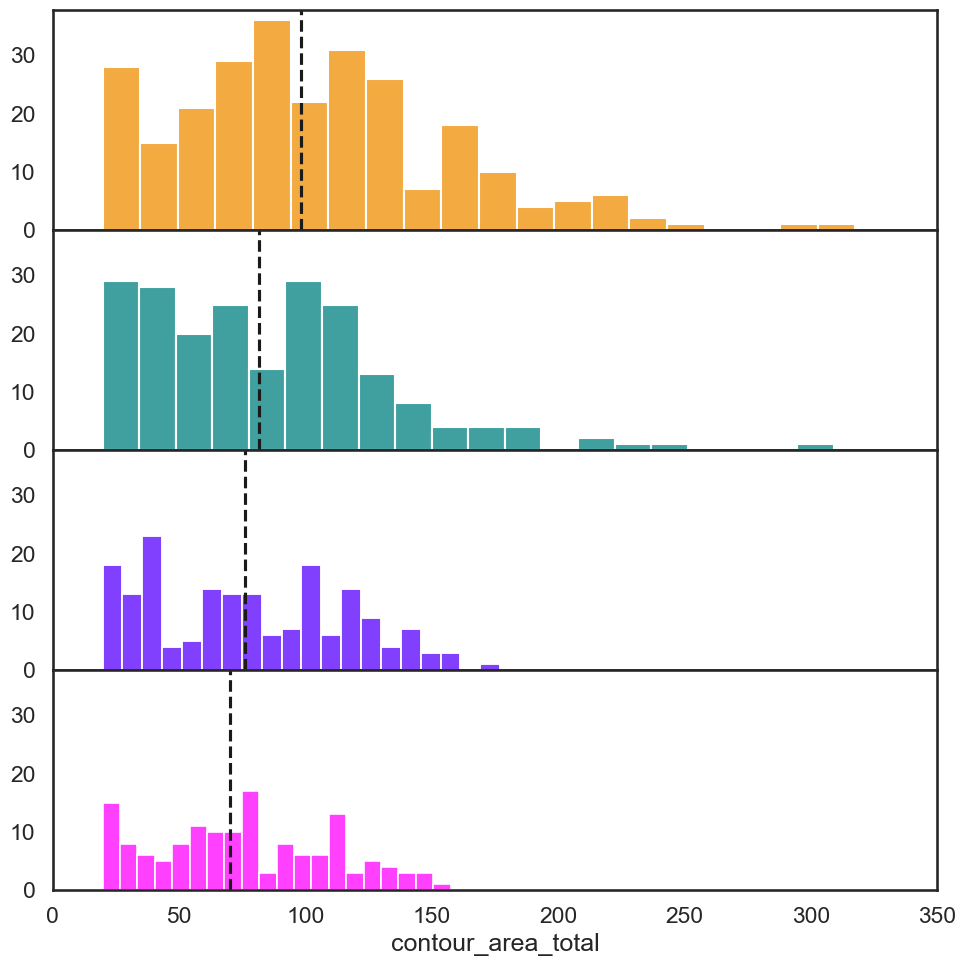

In [194]:
fig, ax = plt.subplots(4,1, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
non_zeros = roi_df.query("contour_area_total > 0")
sns.histplot(data = non_zeros.query("colour == 'R'"), x = "contour_area_total", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0], element="bars", bins = 20)
sns.histplot(data = non_zeros.query("colour == 'G'"), x = "contour_area_total", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1], element="bars", bins = 20)
sns.histplot(data = non_zeros.query("colour == 'B'"), x = "contour_area_total", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2], element="bars", bins = 20)
sns.histplot(data = non_zeros.query("colour == 'UV'"),x = "contour_area_total", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3], element="bars", bins = 20)
colours = ["R", "G", "B", "UV"]
for a, c in zip(ax.flat, colours):
    a.set_ylabel("")
    a.set(xlim = [0, 350])
    a.axvline(np.median(non_zeros.query(f"colour == '{c}'")["contour_area_total"]), c = "k", ls = "--")
plt.tight_layout()


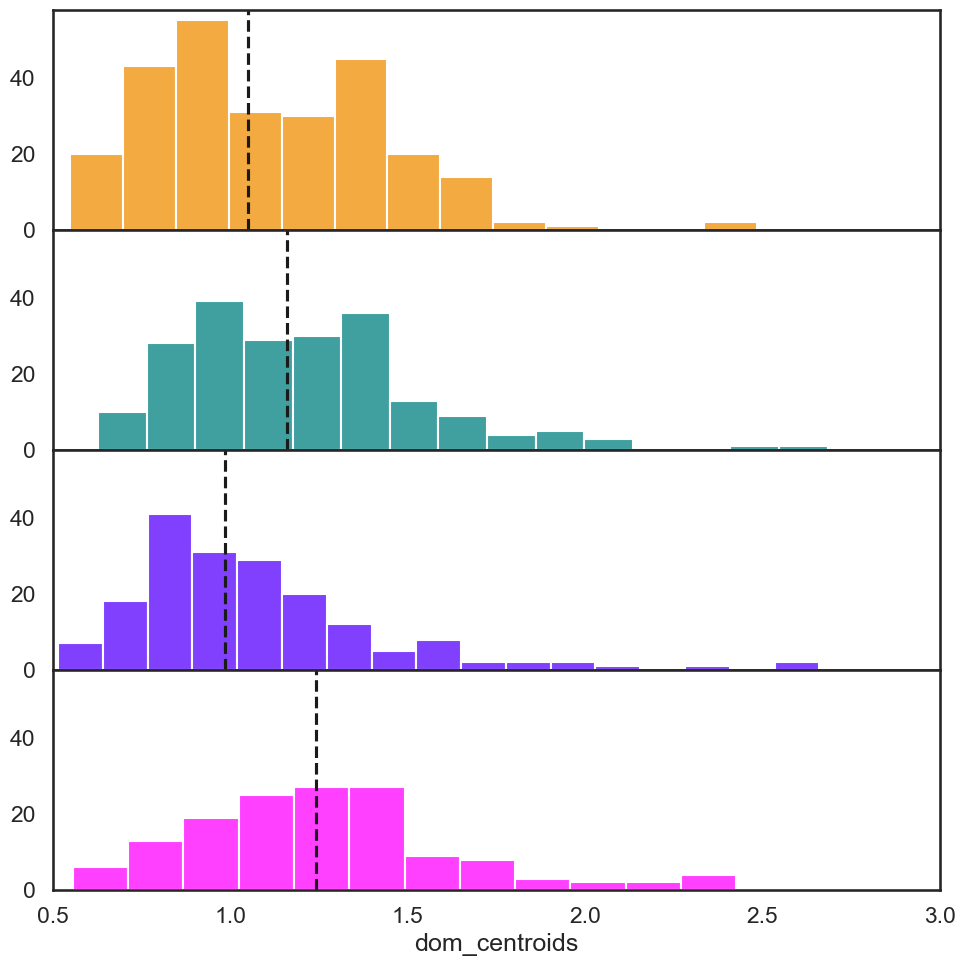

In [152]:
fig, ax = plt.subplots(4,1, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
stat = "dom_centroids"
non_zeros = roi_df.query(f"{stat} > 0")
sns.histplot(data = non_zeros.query("colour == 'R'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0], element="bars")
sns.histplot(data = non_zeros.query("colour == 'G'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1], element="bars")
sns.histplot(data = non_zeros.query("colour == 'B'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2], element="bars")
sns.histplot(data = non_zeros.query("colour == 'UV'"),x = f"{stat}", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3], element="bars")
colours = ["R", "G", "B", "UV"]
for a, c in zip(ax.flat, colours):
    a.set_ylabel("")
    a.set(xlim = [.5, 3])
    a.axvline(np.median(non_zeros.query(f"colour == '{c}'")[f"{stat}"]), c = "k", ls = "--")
plt.tight_layout()


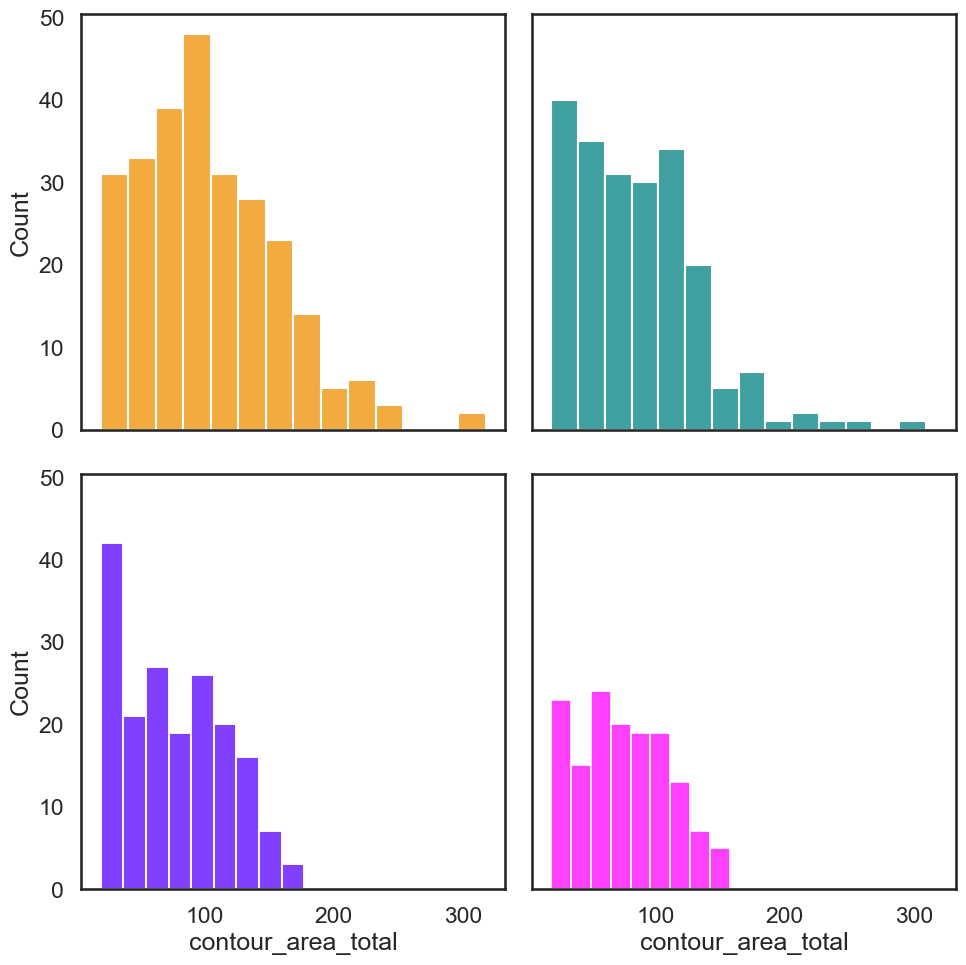

In [154]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharex=True, sharey=True)
non_zeros = roi_df.query("contour_area_total > 0")
sns.histplot(data = non_zeros.query("colour == 'R'"), x = "contour_area_total", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0])
sns.histplot(data = non_zeros.query("colour == 'G'"), x = "contour_area_total", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1])
sns.histplot(data = non_zeros.query("colour == 'B'"), x = "contour_area_total", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2])
sns.histplot(data = non_zeros.query("colour == 'UV'"),x = "contour_area_total", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3])
# for ax in ax.flat:
    # ax.set_xscale("log")
    # ax.set_yscale("log")
    # ax.set(xlim = [0, 1200])
    # ax.set(ylim = [0.5, 3])
#sns.scatterplot(data = roi_df.query("colour == 'R'"), x = "contour_area_total", y = "dom_centroids", hue = "colour", palette=pygor.plotting.custom.fish_palette, ax = ax[0])
plt.tight_layout()


In [82]:
roi_df.filter(items = ["contour_area_total", "colour"]).groupby("colour").describe().reindex(['R', 'G', 'B', 'UV'])

contour_area_total                                                      \
                    count        mean         std  min  25%      50%      75%   
colour                                                                          
R                   485.0  159.752089  166.527485  0.0  0.0  143.676  250.096   
G                   485.0  115.184019  148.808341  0.0  0.0    0.000  198.908   
B                   485.0   92.912903  124.020294  0.0  0.0    0.000  172.890   
UV                  485.0   69.439860  112.254040  0.0  0.0    0.000  133.464   

                 
            max  
colour           
R       969.876  
G       819.898  
B       633.930  
UV      643.612

In [170]:
import scipy

In [213]:
stat = "dom_centroids"
Rs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'R' & contour_area_total > 0")
Gs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'G' & contour_area_total > 0")
Bs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'B' & contour_area_total > 0")
Uvs = roi_df.filter(items =[f"{stat}", "contour_area_total", "colour"]).query("colour == 'UV' & contour_area_total > 0")
F, p = scipy.stats.f_oneway(Rs[f"{stat}"], Gs[f"{stat}"], Bs[f"{stat}"], Uvs[f"{stat}"])

In [214]:
print('%.08f' % p)

0.00000000


(11, 21)


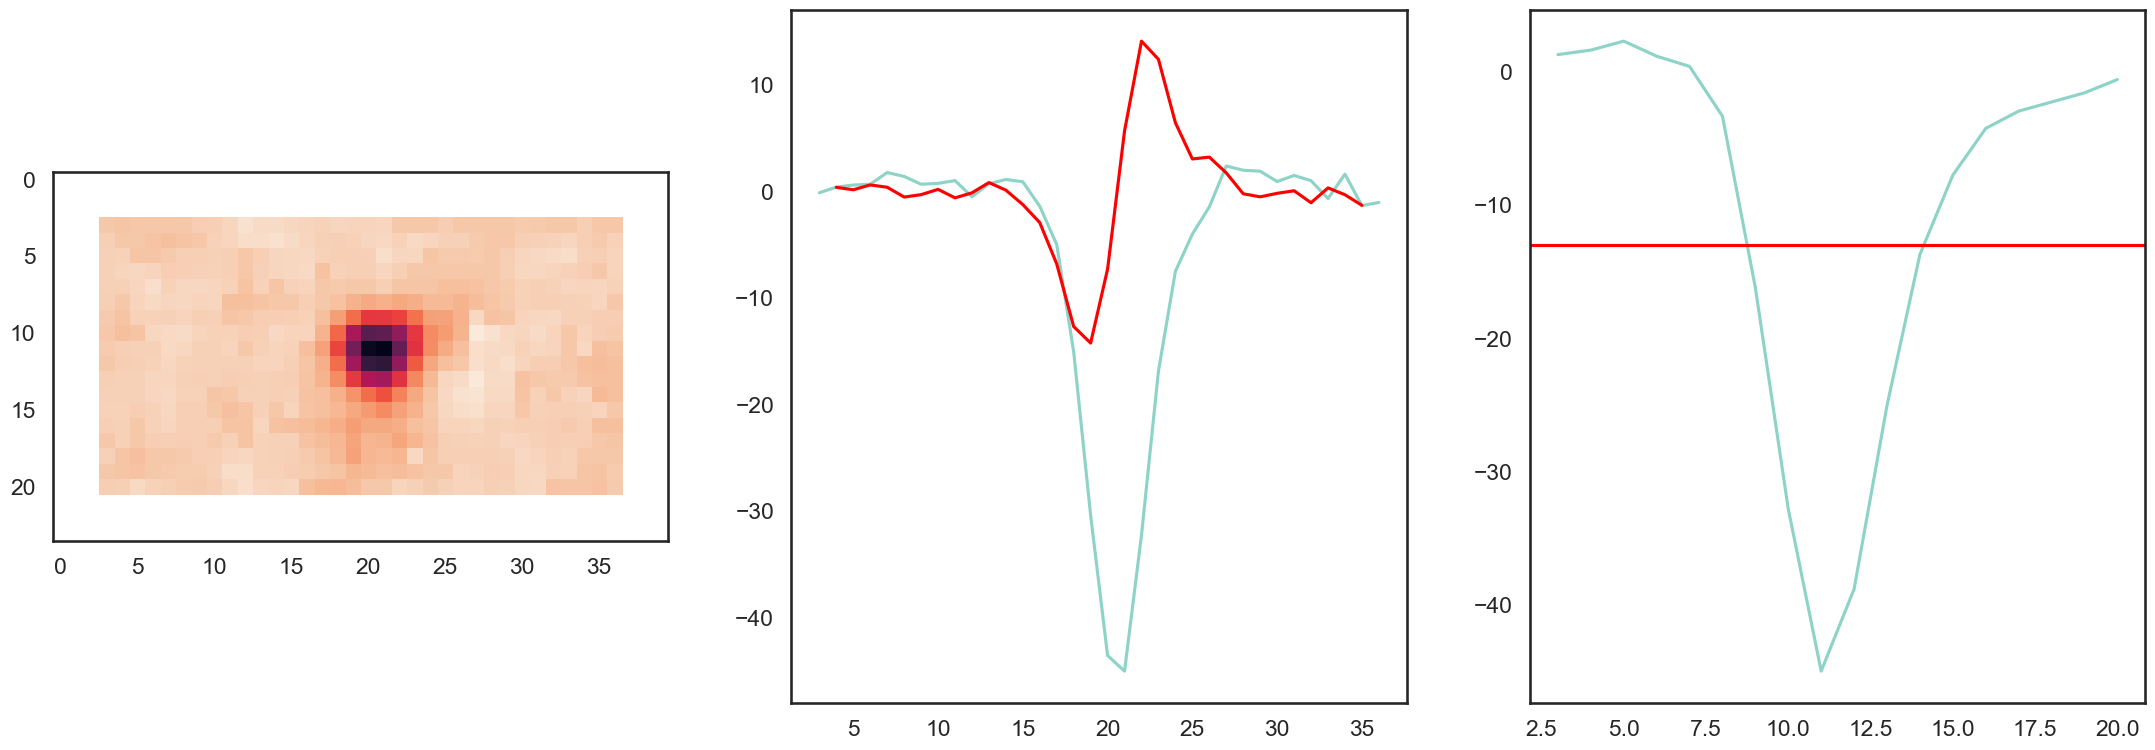

In [51]:
selected_arr = list_of_objs[0].collapse_times()[0]
fig, ax = plt.subplots(1,3, figsize = (9*3, 3*3))
ax[0].imshow(selected_arr)
peak_pix = np.unravel_index(np.argmax(np.abs(selected_arr)), selected_arr.data.shape)
print(peak_pix)
ax[1].plot(selected_arr[peak_pix[0]])
ax[1].plot(np.gradient(selected_arr[peak_pix[0]]), c = "r")
ax[2].plot(selected_arr[:, peak_pix[1]])
level = pygor.strf.contouring._contour_determine_level(selected_arr) * -1
plt.axhline(level, c = "r")

## Plot population stats by chromaticity

In [186]:
chroma_df = pygor.strf.analyse.chromatic_stats(exp)
chroma_df

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (44, 3) + inhomogeneous part.

In [192]:
list_of_objs[0].get_timecourses()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (44, 3) + inhomogeneous part.

In [185]:
tom_fomrat = chroma_df[["area_375", "area_422", "area_478","area_588", "centdom_375", "centdom_422", "centdom_478", "centdom_588"]].replace(0, np.nan)
tom_fomrat

,area_375,area_422,area_478,area_588,centdom_375,centdom_422,centdom_478,centdom_588
0,NaN,NaN,63.896,192.928,NaN,NaN,1.237925,1.379600
1,36.992,NaN,NaN,43.052,1.933361,NaN,NaN,0.924129
2,NaN,NaN,NaN,63.896,NaN,NaN,NaN,0.885790
3,NaN,NaN,NaN,73.926,NaN,NaN,NaN,0.888328
4,127.606,67.649,117.546,121.386,1.325486,2.027392,1.448103,1.624277
...,...,...,...,...,...,...,...,...
480,NaN,41.100,70.024,NaN,NaN,1.381570,0.859132,NaN
481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
tom_fomrat.to_csv(r"C:\Users\Simen\Downloads\chroma_stats.csv", na_rep="nan")

In [55]:
chroma_df.columns

Index(['date', 'path', 'filename', 'curr_path', 'strf_keys', 'cell_id', 'size',
       'ipl_depths', 'opp_bool', 'ampl_375', 'ampl_422', 'ampl_478',
       'ampl_588', 'area_375', 'area_422', 'area_478', 'area_588', 'cat_pol',
       'centdom_375', 'centdom_422', 'centdom_478', 'centdom_588',
       'centneg_375', 'centneg_422', 'centneg_478', 'centneg_588',
       'centpos_375', 'centpos_422', 'centpos_478', 'centpos_588', 'comp_375',
       'comp_422', 'comp_478', 'comp_588', 'peakneg_375', 'peakneg_422',
       'peakneg_478', 'peakneg_588', 'peakpos_375', 'peakpos_422',
       'peakpos_478', 'peakpos_588', 'pol_375', 'pol_422', 'pol_478',
       'pol_588', 'roi', 'spatial_X', 'spatial_Y', 'temporal_len'],
      dtype='object')

In [174]:
chroma_df[["area_375", "area_422", "area_478","area_588", "centdom_375", "centdom_422", "centdom_478", "centdom_588"]]

,area_375,area_422,area_478,area_588,centdom_375,centdom_422,centdom_478,centdom_588
0,0.000,0.000,63.896,192.928,0.000000,0.000000,1.237925,1.379600
1,36.992,0.000,0.000,43.052,1.933361,0.000000,0.000000,0.924129
2,0.000,0.000,0.000,63.896,0.000000,0.000000,0.000000,0.885790
3,0.000,0.000,0.000,73.926,0.000000,0.000000,0.000000,0.888328
4,127.606,67.649,117.546,121.386,1.325486,2.027392,1.448103,1.624277
...,...,...,...,...,...,...,...,...
480,0.000,41.100,70.024,0.000,0.000000,1.381570,0.859132,0.000000
481,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000
482,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000
483,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000


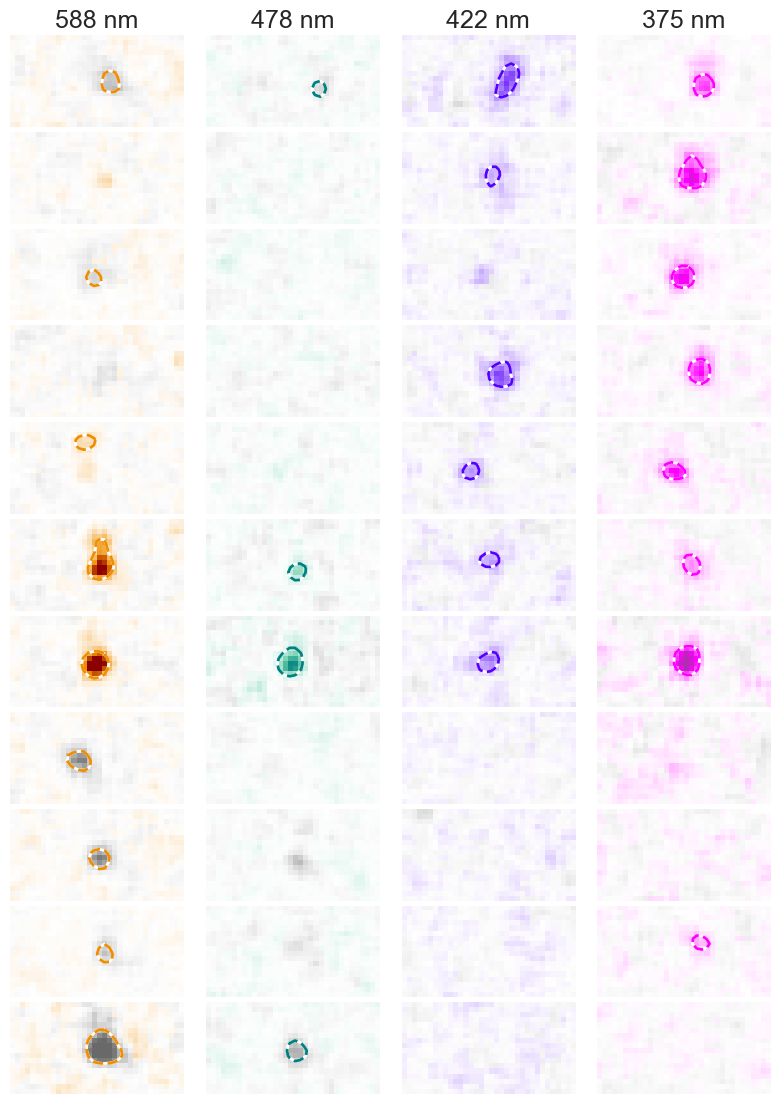

In [175]:
list_of_objs[0].plot_chromatic_overview()

In [90]:
list_of_objs[0].run_bootstrap('y')

Hang on, bootstrapping pygor.strf.temporal components 2500 times:   0%|          | 0/44 [00:00<?, ?it/s]

Hang on, bootstrapping spatial components 1000 times:   0%|          | 0/44 [00:00<?, ?it/s]

14-11-2023:STRF:2023-11-14_0_0_SWN_200_Colours

In [169]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

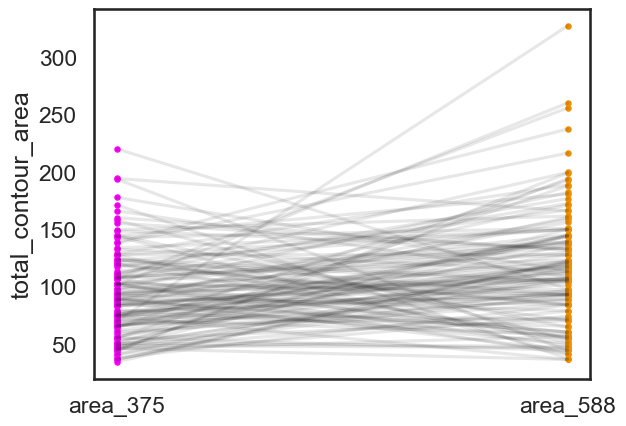

In [176]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

(0.0, 400.0)

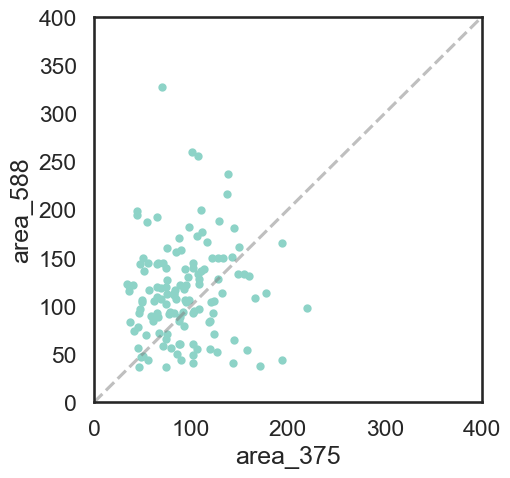

In [184]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(target["area_375"], target["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(0, 400)
plt.ylim(0, 400)


In [ ]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

(10.0, 210.0)

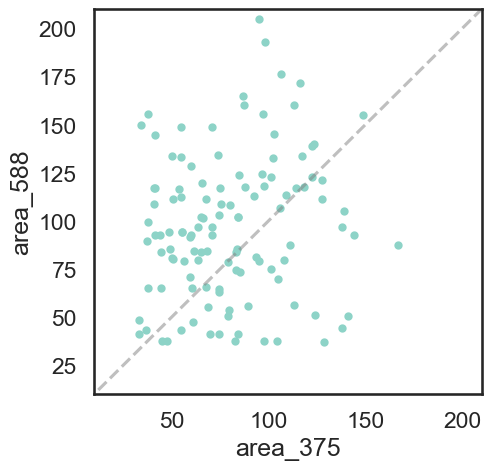

In [193]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(chroma_df["area_375"], chroma_df["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(10, 210)
plt.ylim(10, 210)


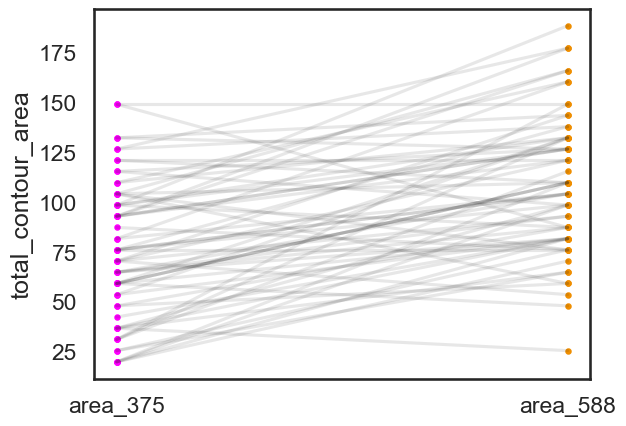

In [ ]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

In [140]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

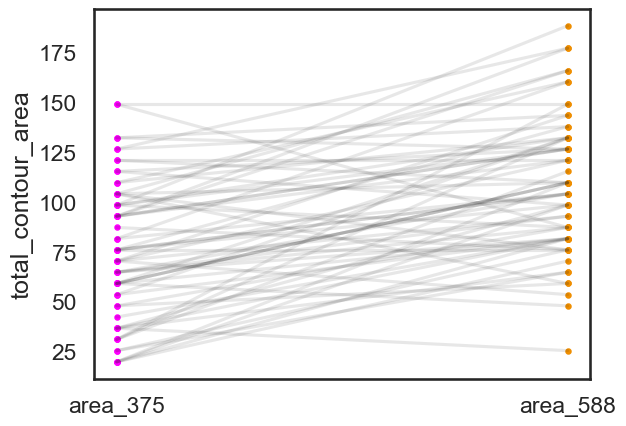

In [141]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

In [515]:
ruv_colour = [pygor.plotting.custom.fish_palette[-1], pygor.plotting.custom.fish_palette[0]]

<AxesSubplot: >

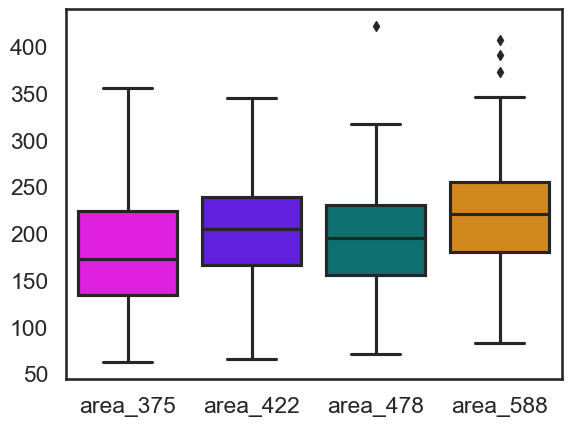

In [119]:
sns.boxplot(data = chroma_df.filter(like = "area").query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1"), palette = reversed(pygor.plotting.fish_palette))

(0.0, 700.0)

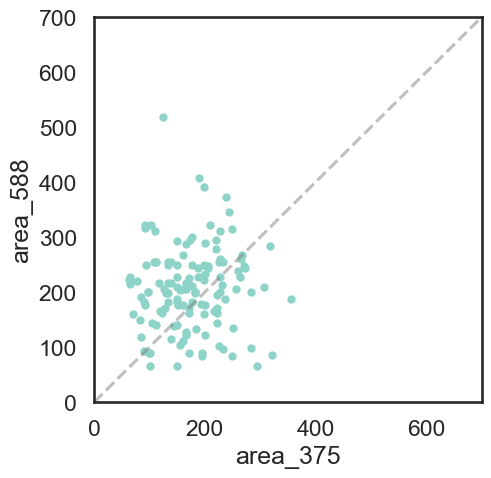

In [120]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(target["area_375"], target["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(0, 700)
plt.ylim(0, 700)
